In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [10]:
train = ImageDataGenerator(rescale=1.0/255.0,horizontal_flip=True,
                           shear_range=0.2, zoom_range=0.2,width_shift_range=0.2,
                           height_shift_range=0.2, fill_mode='nearest', validation_split=0.2)

In [11]:
img_size = 128
batch_size = 25
train_steps = 3462/batch_size
validation_steps = 861/batch_size

In [22]:
traindata = train.flow_from_directory('dataset/training', target_size = (img_size, img_size), batch_size = batch_size, class_mode='categorical', subset='training')


validationdata = train.flow_from_directory('dataset/training', target_size = (img_size, img_size), batch_size = batch_size, class_mode = 'categorical', subset='validation')

Found 6400 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.


In [23]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_size, img_size, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 25088)            

In [24]:
showmodel = model.fit_generator(traindata, steps_per_epoch=train_steps, epochs=3,
                                validation_data=validationdata, validation_steps=validation_steps)

Epoch 1/3
139/138 [==============================] - 296s 2s/step - loss: 0.7448 - accuracy: 0.5125 - val_loss: 0.6867 - val_accuracy: 0.5154
Epoch 2/3
139/138 [==============================] - 315s 2s/step - loss: 0.6747 - accuracy: 0.5937 - val_loss: 0.6566 - val_accuracy: 0.6389
Epoch 3/3
139/138 [==============================] - 317s 2s/step - loss: 0.6438 - accuracy: 0.6285 - val_loss: 0.6358 - val_accuracy: 0.6800


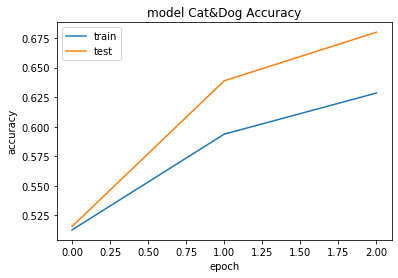

In [31]:
plt.plot(showmodel.history['accuracy'])
plt.plot(showmodel.history['val_accuracy'])
plt.title('model Cat&Dog Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

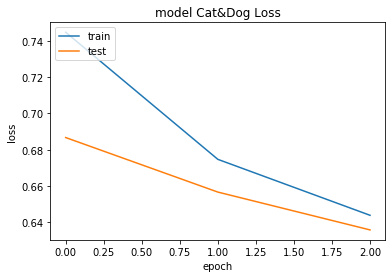

In [32]:
plt.plot(showmodel.history['loss'])
plt.plot(showmodel.history['val_loss'])
plt.title('model Cat&Dog Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()